# 📊 Restaurant Sales EDA Project

This project analyzes restaurant sales data to generate business insights such as:
- Preferred payment methods
- Top-selling products
- City/manager revenue performance
- Daily revenue trends
- Average revenue
- Average revenue in the months of November and December?

Later, this project can be extended to predictive modeling using machine learning.

## 📁 Dataset Description

- **Source**: [Kaggle - Restaurant Sales Data](https://www.kaggle.com/datasets/rohitgrewal/restaurant-sales-data)
- **License**: Open Database License (ODbL)

---

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df = pd.read_csv("/content/9. Sales-Data-Analysis.csv")
df.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,07-11-2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,07-11-2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
2,10454,07-11-2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon
3,10455,08-11-2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin
4,10456,08-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin


In [108]:
df.shape

(254, 9)

In [109]:
df.sample(3)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
110,10570,01-12-2022,Burgers,12.99,492.69,Online,Credit Card,Tom Jackson,London
213,10673,21-12-2022,Beverages,2.95,745.76,In-store,Cash,Joao Silva,Lisbon
194,10654,17-12-2022,Sides & Other,4.99,200.40,Online,Gift Card,Joao Silva,Lisbon


In [110]:
df.head(10)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,07-11-2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,07-11-2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
2,10454,07-11-2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon
3,10455,08-11-2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin
4,10456,08-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin
5,10457,08-11-2022,Fries,3.49,573.07,In-store,Credit Card,Remy Monet,Paris
6,10459,08-11-2022,Sides & Other,4.99,200.40,In-store,Credit Card,Walter Muller,Berlin
7,10460,09-11-2022,Burgers,12.99,554.27,In-store,Credit Card,Remy Monet,Paris
8,10461,09-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Remy Monet,Paris
9,10462,09-11-2022,Fries,3.49,573.07,In-store,Credit Card,Remy Monet,Paris


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    int64  
 1   Date            254 non-null    object 
 2   Product         254 non-null    object 
 3   Price           254 non-null    float64
 4   Quantity        254 non-null    float64
 5   Purchase Type   254 non-null    object 
 6   Payment Method  254 non-null    object 
 7   Manager         254 non-null    object 
 8   City            254 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 18.0+ KB


In [112]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [113]:
df['Quantity'] = df['Quantity'].round().astype(int)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        254 non-null    int64         
 1   Date            254 non-null    datetime64[ns]
 2   Product         254 non-null    object        
 3   Price           254 non-null    float64       
 4   Quantity        254 non-null    int64         
 5   Purchase Type   254 non-null    object        
 6   Payment Method  254 non-null    object        
 7   Manager         254 non-null    object        
 8   City            254 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 18.0+ KB


In [115]:
df.Manager.nunique()

14

In [116]:
df["Manager"] = df["Manager"].str.strip().str.replace(r'\s+', ' ', regex=True)

In [117]:
df.Manager.nunique()

5

In [118]:
df[df.duplicated()]

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City


In [119]:
df[df['Order ID'].duplicated()]

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City


In [120]:
df.describe()

,Order ID,Date,Price,Quantity
count,254.000000,254,254.000000,254.000000
mean,10584.133858,2022-12-03 10:23:37.322834688,7.102323,460.480315
min,10452.000000,2022-11-07 00:00:00,2.950000,200.000000
25%,10520.250000,2022-11-21 00:00:00,3.490000,201.000000
50%,10583.500000,2022-12-03 00:00:00,4.990000,539.000000
75%,10649.750000,2022-12-16 18:00:00,9.950000,677.000000
max,10713.000000,2022-12-29 00:00:00,29.050000,754.000000
std,75.889181,NaN,4.341855,214.979431


## **Most Preferred Payment Method ? --> Credit Card**

In [121]:
df['Payment Method'].value_counts()

,count
Payment Method,
Credit Card,120
Cash,76
Gift Card,58


<Axes: xlabel='Payment Method'>

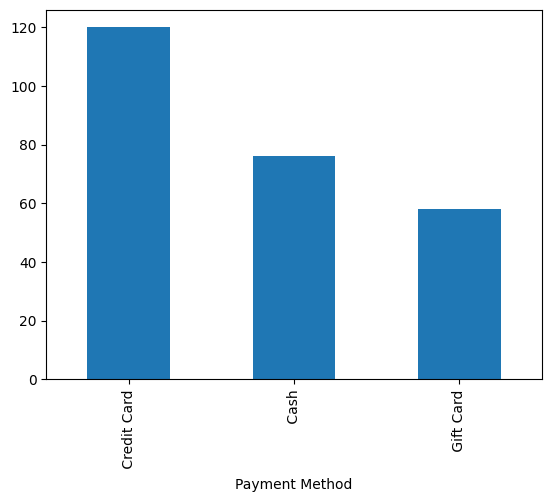

In [122]:
df['Payment Method'].value_counts().plot(kind='bar')

## **Most Selling Product - By Quantity? --> Beverages**
##  **Most Selling Product - By Revenue ? --> Burgers**

In [123]:
# Manually
df[df['Product'] == "Fries"]['Price'].sum()
df[df['Product'] == "Burgers"]['Price'].sum()
df[df['Product'] == "Beverages"]['Price'].sum()


np.float64(147.49999999999997)

In [124]:
df.groupby('Product')['Price'].sum()

,Price
Product,
Beverages,147.50
Burgers,675.48
Chicken Sandwiches,536.50
Fries,200.00
Sides & Other,244.51


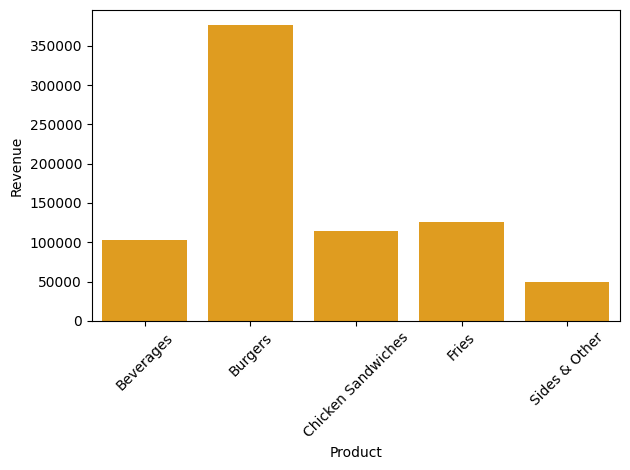

In [125]:
df['Revenue'] = df['Price'] * df['Quantity']

new_df = df.groupby('Product')['Revenue'].sum().reset_index()
sns.barplot(data=new_df, x='Product', y='Revenue', color='orange')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [126]:
df.groupby('Product')['Quantity'].sum()

,Quantity
Product,
Beverages,34988
Burgers,29018
Chicken Sandwiches,11133
Fries,32023
Sides & Other,9800


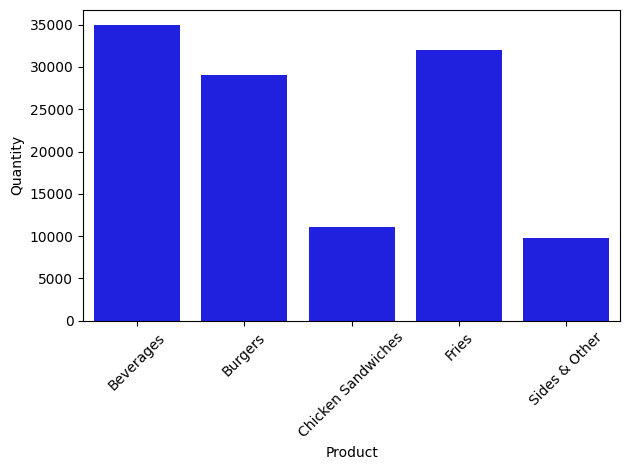

In [127]:
new_df2 = df.groupby('Product')['Quantity'].sum().reset_index()
sns.barplot(data=new_df2, x='Product', y='Quantity', color='blue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Which city had maximum revenue ? --> Lisbon**

In [128]:
df.groupby('City')['Revenue'].sum()

,Revenue
City,
Berlin,100572.34
Lisbon,241635.49
London,211160.04
Madrid,136154.24
Paris,79777.33


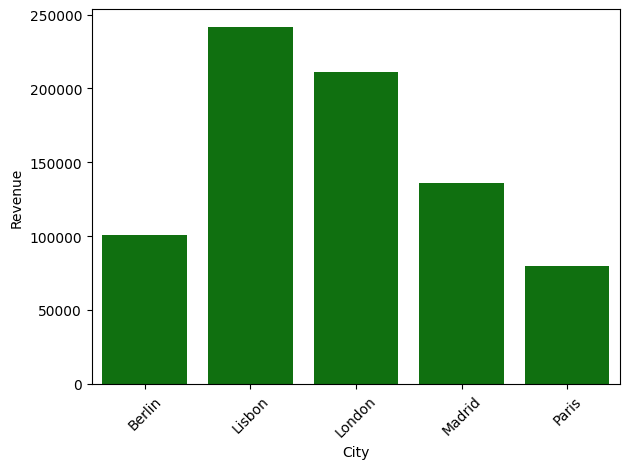

In [129]:
new_df3 = df.groupby('City')['Revenue'].sum().reset_index()
sns.barplot(data=new_df3, x='City', y='Revenue', color='green')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Which Manager earned maximum revenue ? --> Joao Silva**

In [130]:
df.Manager.unique()

array(['Tom Jackson', 'Pablo Perez', 'Joao Silva', 'Walter Muller',
       'Remy Monet'], dtype=object)

In [131]:
df.groupby('Manager')['Revenue'].sum()

,Revenue
Manager,
Joao Silva,241635.49
Pablo Perez,136154.24
Remy Monet,79777.33
Tom Jackson,211160.04
Walter Muller,100572.34


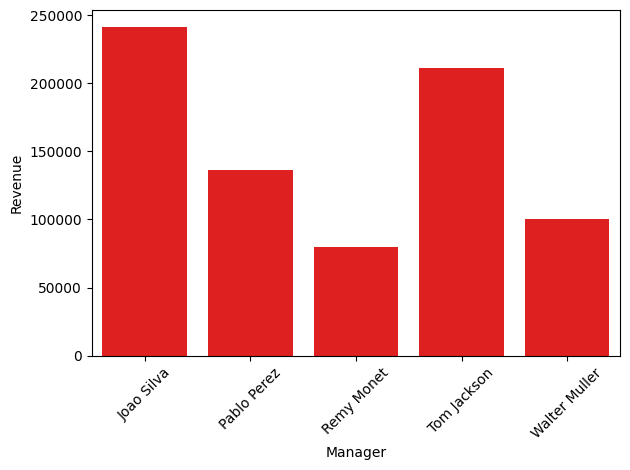

In [133]:
new_df4 = df.groupby('Manager')['Revenue'].sum().reset_index()
sns.barplot(data=new_df4, x='Manager', y='Revenue', color='red')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Date wise revenue.**

<Axes: xlabel='Date', ylabel='Revenue'>

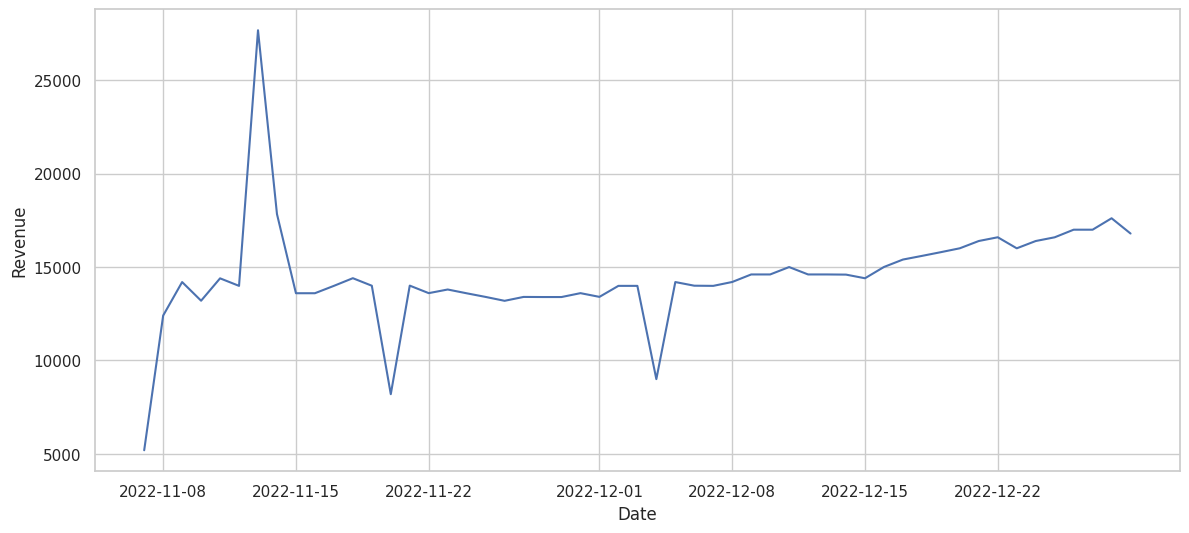

In [144]:
df_daily = df.groupby('Date')['Revenue'].sum().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_daily, x='Date', y='Revenue')

## **Average Revenue**

In [146]:
df['Revenue'].mean()

np.float64(3028.737952755905)

## **Average Revenue of November & December month**

In [147]:
df['Month'] = df['Date'].dt.month

In [149]:
nov = df[df['Month'] == 11]
nov['Revenue'].mean()

np.float64(2938.1869026548666)

In [151]:
dec = df[df['Month'] == 12]
dec['Revenue'].mean()

np.float64(3101.3072340425533)

<Axes: ylabel='Density'>

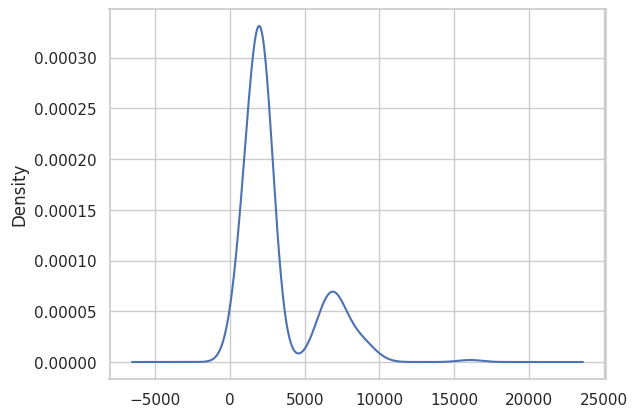

In [152]:
df['Revenue'].plot(kind='kde')

In [155]:
df['Revenue'].skew()

np.float64(1.7629209251316833)

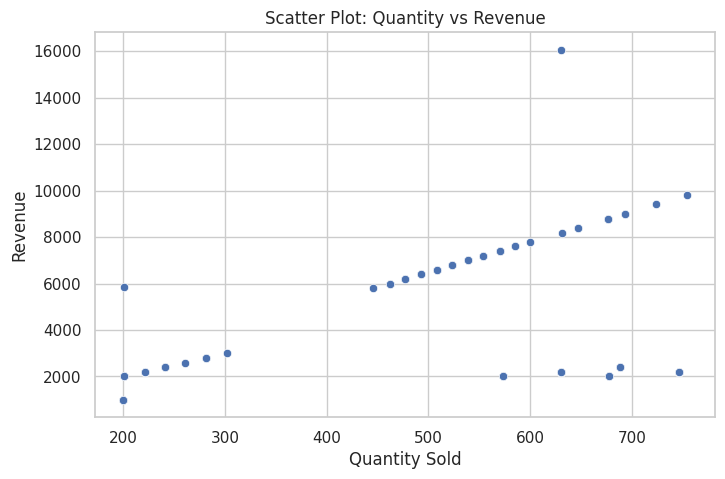

In [158]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Quantity', y='Revenue', data=df)
plt.title('Scatter Plot: Quantity vs Revenue')
plt.xlabel('Quantity Sold')
plt.ylabel('Revenue')
plt.show()

In [159]:
correlation = df['Quantity'].corr(df['Revenue'])
print("Correlation Coefficient:", correlation)

Correlation Coefficient: 0.34883850969690167


<Axes: >

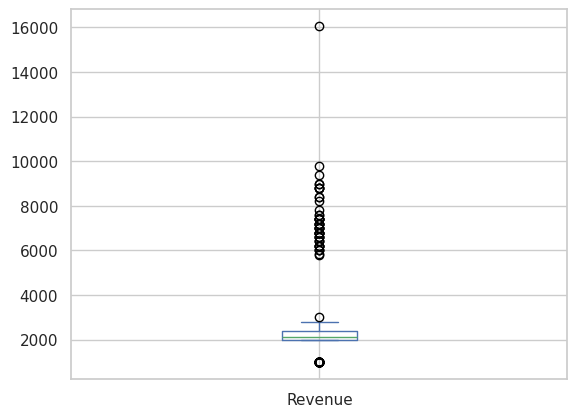

In [160]:
df['Revenue'].plot(kind='box')